In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# PLACE THE IRIS DATA IN A PANDAS
# DATAFRAME
df = pd.DataFrame(data=iris_data.data,
                  columns=iris_data.feature_names)
df = pd.DataFrame({
    'sepal length':iris_data.data[:,0],
    'sepal width':iris_data.data[:,1],
    'petal length':iris_data.data[:,2],
    'petal width':iris_data.data[:,3],
    'clustor':iris_data.target
})
# DISPLAY FIRST 5 RECORDS OF THE
# DATAFRAME
df.head()

,sepal length,sepal width,petal length,petal width,clustor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=df["clustor"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
clustor,
0,50
1,50
2,50


In [ ]:
#method-1
centroids={}
for i in range(3):
  result_list = []
  result_list.append(df.loc[df['clustor']==i]['sepal length'].mean())
  result_list.append(df.loc[df['clustor']==i]['sepal width'].mean())
  result_list.append(df.loc[df['clustor']==i]['petal length'].mean())
  result_list.append(df.loc[df['clustor']==i]['petal width'].mean())
  centroids[i]= result_list
#method-2
centroids1={}
for i in range(3):
  result_list = []
  result_list.append(iris_data.data[iris_data.target == i, 0].mean())
  result_list.append(iris_data.data[iris_data.target == i, 1].mean())
  result_list.append(iris_data.data[iris_data.target == i, 2].mean())
  result_list.append(iris_data.data[iris_data.target == i, 0].mean())
  centroids1[i]= result_list

In [ ]:
centroids1

{0: [5.006, 3.428, 1.4620000000000002, 5.006],
 1: [5.936, 2.7700000000000005, 4.26, 5.936],
 2: [6.587999999999998, 2.974, 5.5520000000000005, 6.587999999999998]}

**plot 2D**

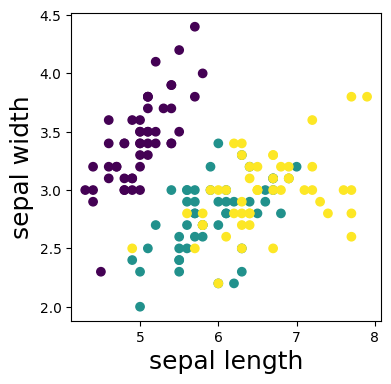

In [ ]:
fig = plt.figure(figsize=(4,4))
plt.scatter(df['sepal length'],df['sepal width'],c=iris_data.target)
plt.xlabel('sepal length',fontsize=18)
plt.ylabel('sepal width',fontsize=18)
plt.show()#not important to see the plotat

**plot 3D**

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

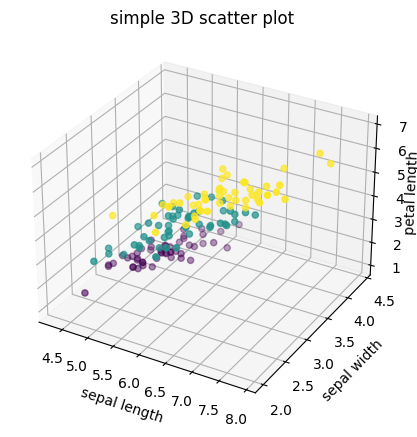

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['sepal length'],df['sepal width'],df['petal length'],c=iris_data.target)
plt.title("simple 3D scatter plot")
ax.set_xlabel('sepal length',fontsize=10)
ax.set_ylabel('sepal width',fontsize=10)
ax.set_zlabel('petal length',fontsize=10,rotation=90)
ax.zaxis.labelpad=-4
plt.show()#not important to see the plotat

In [ ]:
iris_setosa=df.loc[df["clustor"]==0]
iris_virginica=df.loc[df["clustor"]==1]
iris_versicolor=df.loc[df["clustor"]==2]

**Distribution plots**

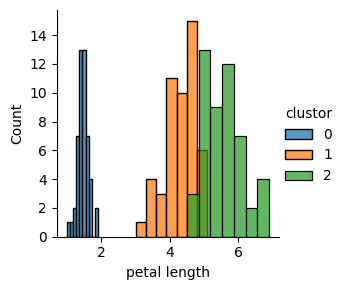

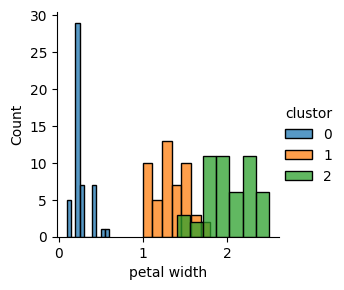

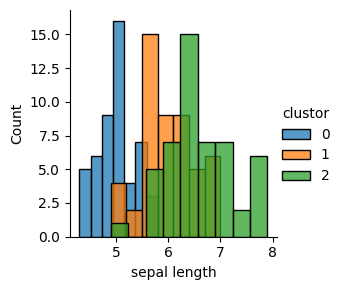

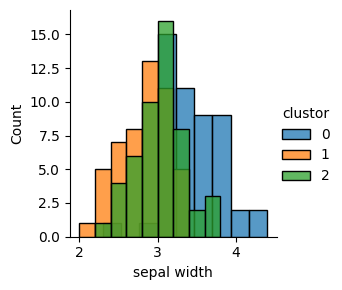

In [ ]:
sns.FacetGrid(df,hue="clustor").map(sns.histplot,"petal length").add_legend()
sns.FacetGrid(df,hue="clustor").map(sns.histplot,"petal width").add_legend()
sns.FacetGrid(df,hue="clustor").map(sns.histplot,"sepal length").add_legend()
sns.FacetGrid(df,hue="clustor").map(sns.histplot,"sepal width").add_legend()
# plt.show()

How to Implementing K-Means Clustering ?
Choose the number of clusters k

*   Select k random points from the data as centroids
*   Assign all the points to the closest cluster centroid
*   Recompute the centroids of newly formed clusters
*   Repeat steps 3 and 4

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_data.data)
    wcss.append(kmeans.inertia_)

Using the elbow method to determine the optimal number of clusters for k-means clustering

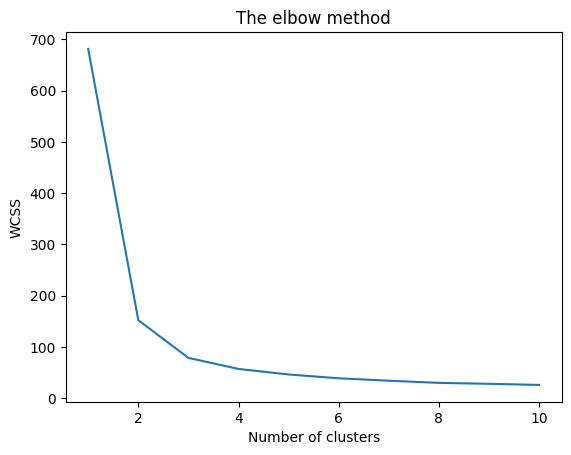

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

**Implementing K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_data.data)

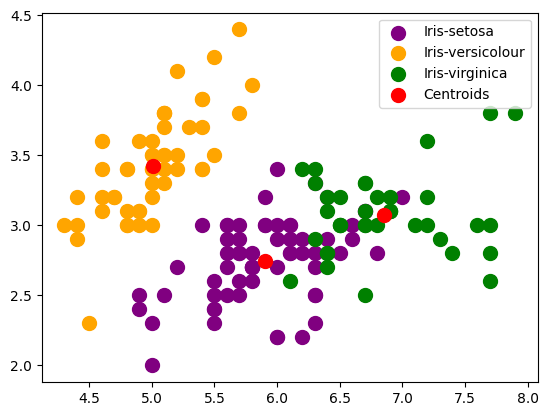

In [ ]:
#Visualising the clusters
plt.scatter(iris_data.data[y_kmeans == 0, 0], iris_data.data[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(iris_data.data[y_kmeans == 1, 0], iris_data.data[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(iris_data.data[y_kmeans == 2, 0], iris_data.data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

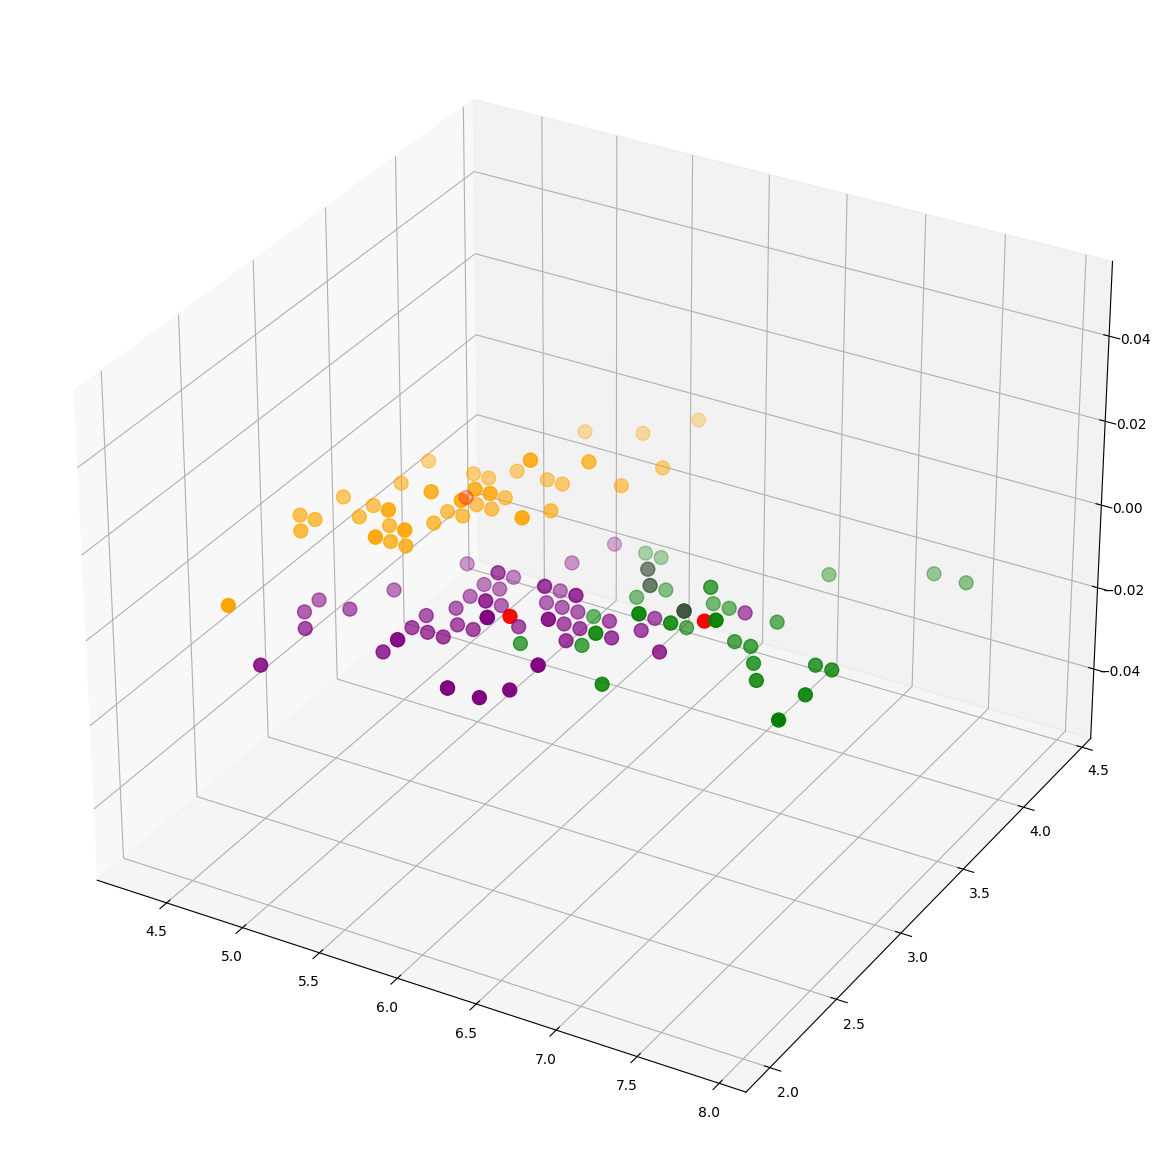

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(iris_data.data[y_kmeans == 0, 0], iris_data.data[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(iris_data.data[y_kmeans == 1, 0], iris_data.data[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(iris_data.data[y_kmeans == 2, 0], iris_data.data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [ ]:
iris_data.data[iris_data.target == 0, 0].mean()

5.006

In [ ]:
type(iris_data.data)

numpy.ndarray

In [ ]:
type(y_kmeans)

numpy.ndarray

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)